# Problem Statement

-  The Challenge is for you to develop a machine learning model to predict suspected elder fraud in the digital payments space as described in Rule 4 of the attached Campus Analytics 2021 Challenge Rules document. Your machine learning model (“Solution”) must meet: (a) the Challenge Criteria, (b) follow the Challenge Instructions and Requirements, and (c) incorporate the Key Deliverables, each described in detail below.
- 
Deliverables
Download the attached trainset dataset
Download the attached testset dataset
Download and read the attached Campus Analytics 2021 Challenge Rules document. This contains critical information about challenge deliverables, instructions, suggestions, judging criteria, and winner eligibility.
To Complete a Submission:

# Build a classification model for predicting elder fraud in the digital payments space as described in Rule 4, which:

- Handles missing variables
- Maximizes the F1 score
- Uses the given data set
- Includes suitable encoding schemes
- Has the least set of feature variables
________________________________________________________________________________________________________________________________________

The dataset provided on the Challenge page is synthetic. Conditional GAN (“CTGAN”) was used to generate the synthetic dataset for this Challenge. CTGAN is a neural network model that helps to detect the distributions for the dataset and tries to generate data records with similar distribution compared with the original datasets. It can deal with both continuous and categorical features.

________________________________________________________________________________________________________________________________________

Challenge Instructions and Requirements:

When creating your Solution, you may use a novel combination of existing machine learning and/or statistical methods, or develop your own novel method in order to extract and/or represent thematic information from the data file.

The output needs to include prediction of a target variable. Additionally, your Solution must meet the following requirements:

You must use Python 3.
You must provide citations and sources.

________________________________________________________________________________________________________________________________________


Challenge Suggestions: You may use any clustering, dimensionality reduction, or other algorithm families. Please note that among other criteria, you will be evaluated on whether your selections of methods are appropriate for structured data.

________________________________________________________________________________________________________________________________________

Key Deliverables to Submit:

Deliverable 1: Your results

A table of your results assigning topics to a list of dataset description identifiers in the format shown below.

Very important note: Each solution received should ensure that the dataset_id is present in every record and arranged numerically in the same order as the testset_for_participants.csv file. The solution should also contain a column called ‘FRAUD_NONFRAUD’, which is the predicted class (either FRAUD or NONFRAUD); value of this column needs to be 0 (FRAUD) and 1 (NonFraud). If this is not the case, the submission will be automatically disqualified.






Deliverable 2: Your method

A description of your approach delivered as:

A visual description (flow chart or similar) of the path of the data through your pipeline. Note the areas where your approach is novel.
A few paragraphs describing the rationale behind your method.
Deliverable 3: Your code

Well-commented code that is operational and can be run using the data provided and generating the output of your approach.
An environment configuration file that lists the names and versions of the libraries you used.
NOTE** - You will use the attached "trainset" dataset to build your model. After you have the model, you will run it on the attached "testset_for_participants," produce the scores, and submit them.



# Variable Description:
- TRAN_AMT                           : Transaction Amount 
- ACCT_PRE_TRAN_AVAIL_BAL            : Account Pre Transaction availble before fraud.
- CUST_AGE                           : Customer Age
- OPEN_ACCT_CT                       : Count of open accounts
- WF_dvc_age                         : Wells fargo acocount age (days)
- PWD_UPDT_TS                        : Date and time of password updated
- CARR_NAME                          : Carieer/broadband Company Name 
- RGN_NAME                           : Region
- STATE_PRVNC_TXT                    : State Province Area
- ALERT_TRGR_CD                      : Alert triggered Platform (mobile or Comp)
- DVC_TYPE_TXT                       : Device Type
- AUTHC_PRIM_TYPE_CD                 : Primary Authentication Type (Password, face ID )
- AUTHC_SCNDRY_STAT_TXT              : Secondary Authentication Status text (Allow, Challeneg Success, Challenege                                            Issued, nan)
- CUST_ZIP                           : Customer Zip Code
- CUST_STATE                         : Customer State 
- PH_NUM_UPDT_TS                     : Phone Number Updated Date,time, Seconds 
- CUST_SINCE_DT                      : Customer Since Date 
- TRAN_TS                            : Transaction Date, time , seconds
- TRAN_DT                            : transaction date
- ACTN_CD                            : to be removed
- ACTN_INTNL_TXT                     : To be removed
- TRAN_TYPE_CD                       : to be removed
- ACTVY_DT                           : Activity Date
- FRAUD_NONFRAUD                     : Fraud/Non-Fraud

Important Variables to consider:
1. TRAN_AMT   
2. ACCT_PRE_TRAN_AVAIL_BAL	
3. CUST_AGE	
4. OPEN_ACCT_CT	
5. WF_dvc_age
6. PWD_UPDT_TS
7. RGN_NAME
8. CUST_STATE
9. PH_NUM_UPDT_TS
10. CUST_SINCE_DT
11. ACTVY_DT
12. ALERT_TRGR_CD

### STEPS TO DO DATA CLEANING and PREPERATION:
- EXPLORATORY DATA ANALYSIS:
    - First, deal with the missing values of the data.
    - Divide the variables into ananymized and non anonymized, and focus on the non-anonymized during EDA.
    - Identify the important variables and plot the distrubution of those variables and observe the skewness.
    - plot the visualization to understand the dataset.(Ex: bar chart for count and heat map for finding correlations.
    - Check the count of the frad/no-fraud variable.
- DATA PREPERATION:
    - Scale every numeric variable considering for analysis, so that algorithm dont perform worse.
    - deal with the missing values.
- TURNING THE IMBALANCED DATASET INTO BALANCED:
    - Utilize random under-sampling to create a blanced dataset.
    - Make use of the test stats(ROC-AUC score, accuracy) to evaluate the perfomance.
- Dimensionality Reduction:
    - perform t-sne test to perform dimensionality reduction.
    - t-sne: t-distributed stochastic neigbour embedding.
        - read here: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [465]:
train=pd.read_excel("Train Dataset.xlsx") #loading the dataset

In [466]:
train['ACTVY_DT'].unique()

array(['5/3/2021', '1/13/2021', '4/8/2021', '8/10/2021', '6/27/2021',
       '5/18/2021', '1/8/2021', '6/14/2021', '7/4/2021', '3/3/2021',
       '2/16/2021', '3/5/2021', '4/20/2021', '4/17/2021', '1/31/2021',
       '3/2/2021', '1/11/2021', '1/12/2021', '6/17/2021', '2/11/2021',
       '1/4/2021', '7/16/2021', '5/13/2021', '6/9/2021', '4/22/2021',
       '3/18/2021', '5/4/2021', '5/12/2021', '2/1/2021', '7/10/2021',
       '7/21/2021', '2/17/2021', '8/4/2021', '4/2/2021', '6/21/2021',
       '3/1/2021', '2/8/2021', '4/11/2021', '5/8/2021', '3/25/2021',
       '7/22/2021', '1/19/2021', '2/18/2021', '5/6/2021', '3/23/2021',
       '3/19/2021', '1/9/2021', '7/28/2021', '2/3/2021', '7/13/2021',
       '8/20/2021', '7/7/2021', '4/1/2021', '7/5/2021', '2/15/2021',
       '6/24/2021', '2/9/2021', '3/13/2021', '1/6/2021', '7/29/2021',
       '1/29/2021', '7/11/2021', '1/22/2021', '3/26/2021', '2/21/2021',
       '7/19/2021', '3/16/2021', '6/5/2021', '6/22/2021', '4/19/2021',
       '3/9/2021'

In [467]:
train['TRAN_DT'].size

14000

In [468]:
train['TRAN_TS'].unique().size

13500

In [469]:
train['TRAN_TS'].size

14000

In [470]:
train.isnull()

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0         False                    False     False         False       False   
1         False                    False     False         False       False   
2         False                    False     False         False       False   
3         False                    False     False         False       False   
4         False                    False     False         False       False   
...         ...                      ...       ...           ...         ...   
13995     False                    False     False         False       False   
13996     False                    False     False         False       False   
13997     False                    False     False         False       False   
13998     False                    False     False         False       False   
13999     False                    False     False         False       False   

       PWD_UPDT_TS  CARR_NAME  RGN_NAME  STATE_PRVNC_TXT  ALERT_TRGR_CD  ...  \
0            False      False     False            False          False  ...   
1             True      False     False            False          False  ...   
2            False      False     False            False          False  ...   
3            False      False     False            False          False  ...   
4            False      False     False            False          False  ...   
...            ...        ...       ...              ...            ...  ...   
13995         True      False     False            False          False  ...   
13996        False      False     False            False          False  ...   
13997        False      False     False            False          False  ...   
13998        False       True      True             True          False  ...   
13999         True      False     False            False          False  ...   

       CUST_STATE  PH_NUM_UPDT_TS  CUST_SINCE_DT  TRAN_TS  TRAN_DT  ACTN_CD  \
0           False           False          False    False    False    False   
1           False            True          False    False    False    False   
2           False           False          False    False    False    False   
3           False           False          False    False    False    False   
4           False           False          False    False    False    False   
...           ...             ...            ...      ...      ...      ...   
13995       False           False          False    False    False    False   
13996       False            True          False    False    False    False   
13997       False           False          False    False    False    False   
13998       False            True          False    False    False    False   
13999       False            True          False    False    False    False   

       ACTN_INTNL_TXT  TRAN_TYPE_CD  ACTVY_DT  FRAUD_NONFRAUD  
0               False         False     False           False  
1               False         False     False           False  
2               False         False     False           False  
3               False         False     False           False  
4               False         False     False           False  
...               ...           ...       ...             ...  
13995           False         False     False           False  
13996           False         False     False           False  
13997           False         False     False           False  
13998           False         False     False           False  
13999           False         False     False           False  

[14000 rows x 24 columns]

In [471]:
train.head(10)

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0      5.38                 23619.91        47             4        2777   
1     65.19                     0.00        45             5        2721   
2     54.84                 34570.63        36             8        1531   
3      0.01                     0.00        62             3         835   
4    497.08                 12725.18        81             2        1095   
5    488.55                  2851.44        45             8           1   
6    490.60                  3018.98        55             7         531   
7    468.40                     0.00        56             6          47   
8      0.01                     0.00        36             6        1182   
9     14.23                  1890.65        72             4         276   

           PWD_UPDT_TS                      CARR_NAME       RGN_NAME  \
0    1/16/2018 11:3:58        cox communications inc.      southwest   
1                  NaN         charter communications      southwest   
2  12/22/2021 10:42:51             utah broadband llc       mountain   
3     2/8/2020 7:28:31             t-mobile usa  inc.      southwest   
4  12/28/2020 12:12:44          cogent communications  south central   
5   3/15/2021 15:36:36  ultimate internet access, inc      southwest   
6    4/30/2021 19:16:2        cox communications inc.      southwest   
7   5/22/2021 18:34:33             t-mobile usa  inc.      southwest   
8    1/27/2021 16:7:20        cox communications inc.      southwest   
9    4/22/2020 9:56:55                            NaN            NaN   

  STATE_PRVNC_TXT ALERT_TRGR_CD  ... CUST_STATE      PH_NUM_UPDT_TS  \
0          nevada          MOBL  ...         NV  2/24/2021 15:55:10   
1      california          MOBL  ...         CA                 NaN   
2            utah          ONLN  ...         MD     5/5/2019 1:8:39   
3      california          MOBL  ...         NV   2/16/2019 6:45:37   
4           texas          MOBL  ...         UT    5/8/2020 10:27:6   
5      california          ONLN  ...         CO    5/18/2021 9:50:5   
6      california          MOBL  ...         CA   3/16/2018 16:50:5   
7      california          ONLN  ...         CA   7/28/2019 12:4:47   
8      california          ONLN  ...         TX     12/6/2019 6:4:6   
9             NaN          ONLN  ...         VA  5/12/2017 10:54:10   

  CUST_SINCE_DT             TRAN_TS    TRAN_DT ACTN_CD ACTN_INTNL_TXT  \
0    1993-01-06    5/3/2021 18:3:58   5/3/2021  SCHPMT     P2P_COMMIT   
1    1971-01-07  1/13/2021 19:19:37  1/13/2021  SCHPMT     P2P_COMMIT   
2    1994-02-01    4/8/2021 9:42:51   4/8/2021  SCHPMT     P2P_COMMIT   
3    2001-11-01  8/10/2021 15:28:31  8/10/2021  SCHPMT     P2P_COMMIT   
4    1987-02-07  6/27/2021 11:12:44  6/27/2021  SCHPMT     P2P_COMMIT   
5    2011-06-13  5/18/2021 14:36:36  5/18/2021  SCHPMT     P2P_COMMIT   
6    1971-10-02    1/8/2021 12:16:2   1/8/2021  SCHPMT     P2P_COMMIT   
7    1991-10-30  6/14/2021 12:34:33  6/14/2021  SCHPMT     P2P_COMMIT   
8    2020-07-08    7/4/2021 12:0:51   7/4/2021  SCHPMT     P2P_COMMIT   
9    1976-12-23    3/3/2021 7:14:46   3/3/2021  SCHPMT     P2P_COMMIT   

  TRAN_TYPE_CD   ACTVY_DT FRAUD_NONFRAUD  
0          P2P   5/3/2021      Non-Fraud  
1          P2P  1/13/2021      Non-Fraud  
2          P2P   4/8/2021          Fraud  
3          P2P  8/10/2021      Non-Fraud  
4          P2P  6/27/2021          Fraud  
5          P2P  5/18/2021          Fraud  
6          P2P   1/8/2021          Fraud  
7          P2P  6/14/2021      Non-Fraud  
8          P2P   7/4/2021      Non-Fraud  
9          P2P   3/3/2021          Fraud  

[10 rows x 24 columns]

In [472]:
train['PH_NUM_UPDT_TS']

0        2/24/2021 15:55:10
1                       NaN
2           5/5/2019 1:8:39
3         2/16/2019 6:45:37
4          5/8/2020 10:27:6
                ...        
13995     7/15/2017 6:58:59
13996                   NaN
13997      5/25/2021 8:50:5
13998                   NaN
13999                   NaN
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object

# Exploratory Data Analysis:

### Handling Missing Values:

<AxesSubplot:>

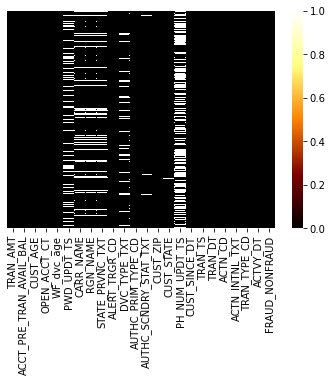

In [473]:
sns.heatmap(train.isnull(),yticklabels=False, cmap="afmhot")
#create a heatmap using seaborn by loding the missing values dataset.
# used to find the missing values

In [474]:
#WE HAVE TO FIND THE MISSING VALUES AND REMOVE THOSE ROWS AND COLUMNS.
#Find highly correlated numeric columns.
#perform EDA on the data.

features_NaN = [ features for features in train.columns if train[features].isnull().sum()>=1 ]

features_NaN


['PWD_UPDT_TS',
 'CARR_NAME',
 'RGN_NAME',
 'STATE_PRVNC_TXT',
 'DVC_TYPE_TXT',
 'AUTHC_SCNDRY_STAT_TXT',
 'CUST_STATE',
 'PH_NUM_UPDT_TS']

In [475]:
for features in features_NaN:
    print(features,'-',np.round(train[features].isnull().mean(),4),'% missing values')

PWD_UPDT_TS - 0.2232 % missing values
CARR_NAME - 0.1935 % missing values
RGN_NAME - 0.1935 % missing values
STATE_PRVNC_TXT - 0.1935 % missing values
DVC_TYPE_TXT - 0.1258 % missing values
AUTHC_SCNDRY_STAT_TXT - 0.0053 % missing values
CUST_STATE - 0.0026 % missing values
PH_NUM_UPDT_TS - 0.5044 % missing values


In [476]:
# Finding the realtionship btw missing values and dependent variable
#only numeric data can be used

In [477]:
#for features in features_NaN:
    #data=train.copy()
    #data[features]=np.where(data[features].isnull(),1,0)
    #data.groupby(features) ['FRAUD_NONFRAUD'].plot.bar()
    #plt.title(features)
    #plt.ylabel('FRAUD AND NONFRAUD').median().plot.bar()
    #plt.show()

In [478]:
#Chi-Square test to know the strength between NaN values and target variable
from scipy.stats import chi2_contingency
    #chisquareresult= chi2_contingency(crosstabs)
    #print(chisquareresult)
for features in features_NaN:
    data=train.copy()
    data[features]=np.where(data[features].isnull(),1,0)
    crosstabresult= pd.crosstab( index= data[features], columns= train['FRAUD_NONFRAUD']  )
    print(crosstabresult)
    chisquareresult= chi2_contingency(crosstabresult)
    print("The chi squre test of this cross tab is:", chisquareresult[1])
#we have to calculate the chi square test for the cross tab result 
#and if the p value of that test is >0.05, we consider the null hypothesis is true(which is the columns are not correlated)

FRAUD_NONFRAUD  Fraud  Non-Fraud
PWD_UPDT_TS                     
0                3628       7247
1                 536       2589
The chi squre test of this cross tab is: 3.576992520379716e-68
FRAUD_NONFRAUD  Fraud  Non-Fraud
CARR_NAME                       
0                2195       9096
1                1969        740
The chi squre test of this cross tab is: 0.0
FRAUD_NONFRAUD  Fraud  Non-Fraud
RGN_NAME                        
0                2195       9096
1                1969        740
The chi squre test of this cross tab is: 0.0
FRAUD_NONFRAUD   Fraud  Non-Fraud
STATE_PRVNC_TXT                  
0                 2195       9096
1                 1969        740
The chi squre test of this cross tab is: 0.0
FRAUD_NONFRAUD  Fraud  Non-Fraud
DVC_TYPE_TXT                    
0                3215       9024
1                 949        812
The chi squre test of this cross tab is: 5.763962270780541e-124
FRAUD_NONFRAUD         Fraud  Non-Fraud
AUTHC_SCNDRY_STAT_TXT             

In [479]:
print(crosstabresult)

FRAUD_NONFRAUD  Fraud  Non-Fraud
PH_NUM_UPDT_TS                  
0                2816       4123
1                1348       5713


In [480]:
from scipy.stats import chi2_contingency
for crosstabs in crosstabresult:
    print(crosstabs)
    #chisquareresult= chi2_contingency(crosstabs)
    #print(chisquareresult)

Fraud
Non-Fraud


In [481]:
crosstabresult.size

4

Correalted columns in order:
- RGN_NAME (HIGHLY CORREALTED)
- STATE_PRVNC_TEST
- CARR_NAME 
- PH_NUM_UPDT_TS 
- DVC_TYPE_TXT
- PWD_UPDT_TS
- AUTHC_SCNDRY_STAT_TXT
- CUST_STATE

In [482]:
train[['RGN_NAME','STATE_PRVNC_TXT','CARR_NAME']].head(10)

RGN_NAME STATE_PRVNC_TXT                      CARR_NAME
0      southwest          nevada        cox communications inc.
1      southwest      california         charter communications
2       mountain            utah             utah broadband llc
3      southwest      california             t-mobile usa  inc.
4  south central           texas          cogent communications
5      southwest      california  ultimate internet access, inc
6      southwest      california        cox communications inc.
7      southwest      california             t-mobile usa  inc.
8      southwest      california        cox communications inc.
9            NaN             NaN                            NaN

Report(9/29/2021):
- Career name , region name and state province are highly corrrelated with the target variable among the columns with null values. 
- This implies that, those three columns should never be removed and to be dealt with missing values.

### Performing Hierarchial Clustering:

In [483]:
train['PWD_UPDT_TS'] = train['PWD_UPDT_TS'].str.split().str[0]

train['TRAN_TS'] = train['TRAN_TS'].str.split().str[0]

train['PH_NUM_UPDT_TS'] = train['PH_NUM_UPDT_TS'].str.split().str[0]

#time stamp removed

In [484]:
train.head()

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0      5.38                 23619.91        47             4        2777   
1     65.19                     0.00        45             5        2721   
2     54.84                 34570.63        36             8        1531   
3      0.01                     0.00        62             3         835   
4    497.08                 12725.18        81             2        1095   

  PWD_UPDT_TS                CARR_NAME       RGN_NAME STATE_PRVNC_TXT  \
0   1/16/2018  cox communications inc.      southwest          nevada   
1         NaN   charter communications      southwest      california   
2  12/22/2021       utah broadband llc       mountain            utah   
3    2/8/2020       t-mobile usa  inc.      southwest      california   
4  12/28/2020    cogent communications  south central           texas   

  ALERT_TRGR_CD  ... CUST_STATE PH_NUM_UPDT_TS CUST_SINCE_DT    TRAN_TS  \
0          MOBL  ...         NV      2/24/2021    1993-01-06   5/3/2021   
1          MOBL  ...         CA            NaN    1971-01-07  1/13/2021   
2          ONLN  ...         MD       5/5/2019    1994-02-01   4/8/2021   
3          MOBL  ...         NV      2/16/2019    2001-11-01  8/10/2021   
4          MOBL  ...         UT       5/8/2020    1987-02-07  6/27/2021   

     TRAN_DT ACTN_CD ACTN_INTNL_TXT TRAN_TYPE_CD   ACTVY_DT FRAUD_NONFRAUD  
0   5/3/2021  SCHPMT     P2P_COMMIT          P2P   5/3/2021      Non-Fraud  
1  1/13/2021  SCHPMT     P2P_COMMIT          P2P  1/13/2021      Non-Fraud  
2   4/8/2021  SCHPMT     P2P_COMMIT          P2P   4/8/2021          Fraud  
3  8/10/2021  SCHPMT     P2P_COMMIT          P2P  8/10/2021      Non-Fraud  
4  6/27/2021  SCHPMT     P2P_COMMIT          P2P  6/27/2021          Fraud  

[5 rows x 24 columns]

In [485]:
#plt.figure(figsize=(10, 7))
#plt.title("Customer Dendograms")
#dend = shc.dendrogram(shc.linkage(HAC_Clustering, method='ward'))
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#cluster.fit_predict(X)

In [486]:
#fraud vs. normal transactions 
counts = train['FRAUD_NONFRAUD'].value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 9836 non-fraudulent transactions (70.257%) and 4164 fraudulent transactions (29.743%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

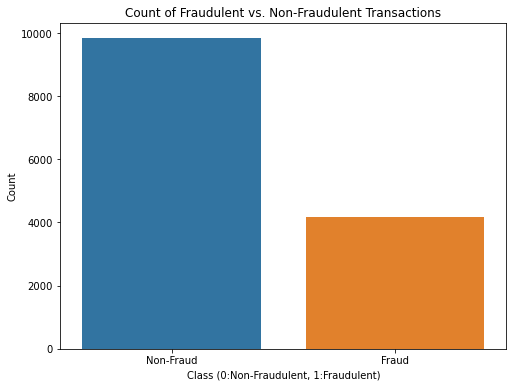

In [487]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Important Variables to consider:
1. TRAN_AMT   
2. ACCT_PRE_TRAN_AVAIL_BAL	
3. CUST_AGE	
4. OPEN_ACCT_CT	
5. WF_dvc_age
6. PWD_UPDT_TS
7. RGN_NAME
8. CUST_STATE
9. PH_NUM_UPDT_TS
10. CUST_SINCE_DT
11. ACTVY_DT
12. ALERT_TRGR_CD

In [488]:
train.head()

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0      5.38                 23619.91        47             4        2777   
1     65.19                     0.00        45             5        2721   
2     54.84                 34570.63        36             8        1531   
3      0.01                     0.00        62             3         835   
4    497.08                 12725.18        81             2        1095   

  PWD_UPDT_TS                CARR_NAME       RGN_NAME STATE_PRVNC_TXT  \
0   1/16/2018  cox communications inc.      southwest          nevada   
1         NaN   charter communications      southwest      california   
2  12/22/2021       utah broadband llc       mountain            utah   
3    2/8/2020       t-mobile usa  inc.      southwest      california   
4  12/28/2020    cogent communications  south central           texas   

  ALERT_TRGR_CD  ... CUST_STATE PH_NUM_UPDT_TS CUST_SINCE_DT    TRAN_TS  \
0          MOBL  ...         NV      2/24/2021    1993-01-06   5/3/2021   
1          MOBL  ...         CA            NaN    1971-01-07  1/13/2021   
2          ONLN  ...         MD       5/5/2019    1994-02-01   4/8/2021   
3          MOBL  ...         NV      2/16/2019    2001-11-01  8/10/2021   
4          MOBL  ...         UT       5/8/2020    1987-02-07  6/27/2021   

     TRAN_DT ACTN_CD ACTN_INTNL_TXT TRAN_TYPE_CD   ACTVY_DT FRAUD_NONFRAUD  
0   5/3/2021  SCHPMT     P2P_COMMIT          P2P   5/3/2021      Non-Fraud  
1  1/13/2021  SCHPMT     P2P_COMMIT          P2P  1/13/2021      Non-Fraud  
2   4/8/2021  SCHPMT     P2P_COMMIT          P2P   4/8/2021          Fraud  
3  8/10/2021  SCHPMT     P2P_COMMIT          P2P  8/10/2021      Non-Fraud  
4  6/27/2021  SCHPMT     P2P_COMMIT          P2P  6/27/2021          Fraud  

[5 rows x 24 columns]

In [489]:
train1=train.copy()

In [490]:
train1=train1.iloc[:,[0,1,2,3,4,5,7,9,14,15,16,22,23]]
train1.head()

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0      5.38                 23619.91        47             4        2777   
1     65.19                     0.00        45             5        2721   
2     54.84                 34570.63        36             8        1531   
3      0.01                     0.00        62             3         835   
4    497.08                 12725.18        81             2        1095   

  PWD_UPDT_TS       RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0   1/16/2018      southwest          MOBL         NV      2/24/2021   
1         NaN      southwest          MOBL         CA            NaN   
2  12/22/2021       mountain          ONLN         MD       5/5/2019   
3    2/8/2020      southwest          MOBL         NV      2/16/2019   
4  12/28/2020  south central          MOBL         UT       5/8/2020   

  CUST_SINCE_DT   ACTVY_DT FRAUD_NONFRAUD  
0    1993-01-06   5/3/2021      Non-Fraud  
1    1971-01-07  1/13/2021      Non-Fraud  
2    1994-02-01   4/8/2021          Fraud  
3    2001-11-01  8/10/2021      Non-Fraud  
4    1987-02-07  6/27/2021          Fraud

In [491]:
FRAUD_NONFRAUD=pd.get_dummies(train1['FRAUD_NONFRAUD'],drop_first=True)
dummies=train1.drop('FRAUD_NONFRAUD',axis=1)
train1=pd.concat([dummies,FRAUD_NONFRAUD],axis=1)
train1

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0          5.38                 23619.91        47             4        2777   
1         65.19                     0.00        45             5        2721   
2         54.84                 34570.63        36             8        1531   
3          0.01                     0.00        62             3         835   
4        497.08                 12725.18        81             2        1095   
...         ...                      ...       ...           ...         ...   
13995   1937.21                   230.75        55             4         142   
13996    114.38                     0.00        44            10         272   
13997    493.00                  2848.63        54             3         517   
13998    491.64                  3163.25        21             3           0   
13999      6.02                     0.00        60             6         944   

      PWD_UPDT_TS       RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0       1/16/2018      southwest          MOBL         NV      2/24/2021   
1             NaN      southwest          MOBL         CA            NaN   
2      12/22/2021       mountain          ONLN         MD       5/5/2019   
3        2/8/2020      southwest          MOBL         NV      2/16/2019   
4      12/28/2020  south central          MOBL         UT       5/8/2020   
...           ...            ...           ...        ...            ...   
13995         NaN      southwest          MOBL         CA      7/15/2017   
13996   11/2/2017      southwest          MOBL         CO            NaN   
13997    6/3/2021      southwest          MOBL         FL      5/25/2021   
13998    3/2/2020            NaN          ONLN         CA            NaN   
13999         NaN  south central          MOBL         NJ            NaN   

      CUST_SINCE_DT   ACTVY_DT  Non-Fraud  
0        1993-01-06   5/3/2021          1  
1        1971-01-07  1/13/2021          1  
2        1994-02-01   4/8/2021          0  
3        2001-11-01  8/10/2021          1  
4        1987-02-07  6/27/2021          0  
...             ...        ...        ...  
13995    2001-06-05  3/12/2021          1  
13996    2010-06-03  6/11/2021          1  
13997    1984-10-27  5/16/2021          0  
13998    2021-03-01  5/11/2021          0  
13999    2013-01-09  2/15/2021          1  

[14000 rows x 13 columns]

In [492]:
corr = train1.corr()
corr

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  \
TRAN_AMT                 1.000000                 0.095355  0.023688   
ACCT_PRE_TRAN_AVAIL_BAL  0.095355                 1.000000 -0.030382   
CUST_AGE                 0.023688                -0.030382  1.000000   
OPEN_ACCT_CT             0.059517                 0.087180 -0.013212   
WF_dvc_age               0.008768                 0.083629 -0.013567   
Non-Fraud               -0.336169                 0.011808 -0.044426   

                         OPEN_ACCT_CT  WF_dvc_age  Non-Fraud  
TRAN_AMT                     0.059517    0.008768  -0.336169  
ACCT_PRE_TRAN_AVAIL_BAL      0.087180    0.083629   0.011808  
CUST_AGE                    -0.013212   -0.013567  -0.044426  
OPEN_ACCT_CT                 1.000000    0.068204   0.051024  
WF_dvc_age                   0.068204    1.000000   0.116179  
Non-Fraud                    0.051024    0.116179   1.000000

<AxesSubplot:>

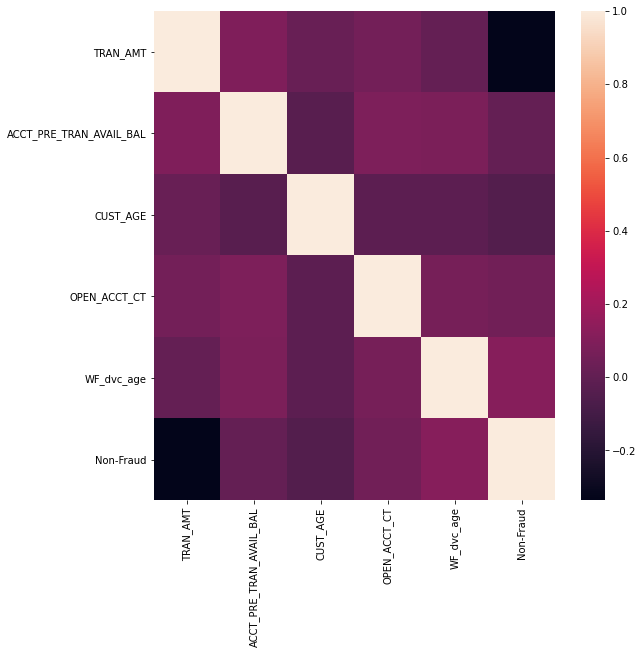

In [493]:
plt.figure(figsize=(9,9))
sns.heatmap(corr)

In [494]:
skew_ = train1.skew()
skew_

TRAN_AMT                    2.307001
ACCT_PRE_TRAN_AVAIL_BAL     5.772929
CUST_AGE                   -0.216352
OPEN_ACCT_CT               12.603713
WF_dvc_age                  1.254167
Non-Fraud                  -0.886376
dtype: float64

In [495]:
train1.head()

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  \
0      5.38                 23619.91        47             4        2777   
1     65.19                     0.00        45             5        2721   
2     54.84                 34570.63        36             8        1531   
3      0.01                     0.00        62             3         835   
4    497.08                 12725.18        81             2        1095   

  PWD_UPDT_TS       RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0   1/16/2018      southwest          MOBL         NV      2/24/2021   
1         NaN      southwest          MOBL         CA            NaN   
2  12/22/2021       mountain          ONLN         MD       5/5/2019   
3    2/8/2020      southwest          MOBL         NV      2/16/2019   
4  12/28/2020  south central          MOBL         UT       5/8/2020   

  CUST_SINCE_DT   ACTVY_DT  Non-Fraud  
0    1993-01-06   5/3/2021          1  
1    1971-01-07  1/13/2021          1  
2    1994-02-01   4/8/2021          0  
3    2001-11-01  8/10/2021          1  
4    1987-02-07  6/27/2021          0

In [496]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler2 = StandardScaler()
#scaled_time = scaler.fit_transform([['Time']])
#flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
#scaled_time = pd.Series(flat_list1)

In [497]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
scaler = StandardScaler()
train1_scaled = scaler.fit_transform(train1.iloc[:,[0,1,2,3,4]])
  
train1_normalized = normalize(train1_scaled)
  
# Converting the numpy array into a pandas DataFrame
train1_normalized = pd.DataFrame(train1_normalized)

In [498]:
train1_normalized

0         1         2         3         4
0     -0.248806  0.130860 -0.107924 -0.086230  0.949678
1     -0.201323 -0.103974 -0.144518 -0.056018  0.961580
2     -0.348365  0.407810 -0.478344  0.073902  0.691417
3     -0.752116 -0.296490  0.371784 -0.351422  0.291025
4      0.381098  0.045442  0.785366 -0.281486  0.395809
...         ...       ...       ...       ...       ...
13995  0.987537 -0.063052  0.010662 -0.055606 -0.132625
13996 -0.495540 -0.334116 -0.516366  0.360008 -0.496555
13997  0.810725 -0.291824  0.003949 -0.479322 -0.166729
13998  0.317936 -0.110255 -0.817483 -0.189154 -0.427438
13999 -0.776096 -0.312769  0.294912 -0.067407  0.456436

[14000 rows x 5 columns]

In [499]:
train1_normalized.columns =['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT','WF_dvc_age']
train1_normalized

TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age
0     -0.248806                 0.130860 -0.107924     -0.086230    0.949678
1     -0.201323                -0.103974 -0.144518     -0.056018    0.961580
2     -0.348365                 0.407810 -0.478344      0.073902    0.691417
3     -0.752116                -0.296490  0.371784     -0.351422    0.291025
4      0.381098                 0.045442  0.785366     -0.281486    0.395809
...         ...                      ...       ...           ...         ...
13995  0.987537                -0.063052  0.010662     -0.055606   -0.132625
13996 -0.495540                -0.334116 -0.516366      0.360008   -0.496555
13997  0.810725                -0.291824  0.003949     -0.479322   -0.166729
13998  0.317936                -0.110255 -0.817483     -0.189154   -0.427438
13999 -0.776096                -0.312769  0.294912     -0.067407    0.456436

[14000 rows x 5 columns]

In [500]:
drop1=train1.drop(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT','WF_dvc_age'],axis=1)
train1=pd.concat([drop1,train1_normalized],axis=1)
train1

PWD_UPDT_TS       RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0       1/16/2018      southwest          MOBL         NV      2/24/2021   
1             NaN      southwest          MOBL         CA            NaN   
2      12/22/2021       mountain          ONLN         MD       5/5/2019   
3        2/8/2020      southwest          MOBL         NV      2/16/2019   
4      12/28/2020  south central          MOBL         UT       5/8/2020   
...           ...            ...           ...        ...            ...   
13995         NaN      southwest          MOBL         CA      7/15/2017   
13996   11/2/2017      southwest          MOBL         CO            NaN   
13997    6/3/2021      southwest          MOBL         FL      5/25/2021   
13998    3/2/2020            NaN          ONLN         CA            NaN   
13999         NaN  south central          MOBL         NJ            NaN   

      CUST_SINCE_DT   ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0        1993-01-06   5/3/2021          1 -0.248806                 0.130860   
1        1971-01-07  1/13/2021          1 -0.201323                -0.103974   
2        1994-02-01   4/8/2021          0 -0.348365                 0.407810   
3        2001-11-01  8/10/2021          1 -0.752116                -0.296490   
4        1987-02-07  6/27/2021          0  0.381098                 0.045442   
...             ...        ...        ...       ...                      ...   
13995    2001-06-05  3/12/2021          1  0.987537                -0.063052   
13996    2010-06-03  6/11/2021          1 -0.495540                -0.334116   
13997    1984-10-27  5/16/2021          0  0.810725                -0.291824   
13998    2021-03-01  5/11/2021          0  0.317936                -0.110255   
13999    2013-01-09  2/15/2021          1 -0.776096                -0.312769   

       CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0     -0.107924     -0.086230    0.949678  
1     -0.144518     -0.056018    0.961580  
2     -0.478344      0.073902    0.691417  
3      0.371784     -0.351422    0.291025  
4      0.785366     -0.281486    0.395809  
...         ...           ...         ...  
13995  0.010662     -0.055606   -0.132625  
13996 -0.516366      0.360008   -0.496555  
13997  0.003949     -0.479322   -0.166729  
13998 -0.817483     -0.189154   -0.427438  
13999  0.294912     -0.067407    0.456436  

[14000 rows x 13 columns]

In [501]:
corr=train1.corr()

In [502]:
corr

Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
Non-Fraud                 1.000000 -0.487884                -0.057068   
TRAN_AMT                 -0.487884  1.000000                 0.119163   
ACCT_PRE_TRAN_AVAIL_BAL  -0.057068  0.119163                 1.000000   
CUST_AGE                 -0.049490  0.026494                -0.048116   
OPEN_ACCT_CT              0.044826  0.039581                 0.146859   
WF_dvc_age                0.100332 -0.002569                 0.140296   

                         CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
Non-Fraud               -0.049490      0.044826    0.100332  
TRAN_AMT                 0.026494      0.039581   -0.002569  
ACCT_PRE_TRAN_AVAIL_BAL -0.048116      0.146859    0.140296  
CUST_AGE                 1.000000     -0.034002   -0.033569  
OPEN_ACCT_CT            -0.034002      1.000000    0.114230  
WF_dvc_age              -0.033569      0.114230    1.000000

fraud vs variables:
1. WF_dvc_age increases              -> fraud decreases 
2. OPEN_ACC_CT increases             -> fraud deceases
3. CUST_AGE increases                -> fraud increses
4. ACCT_PRE_TRAN_AVAIL_BAL increases -> fraud increases
5. TRAN_AMT increases                -> fraud increases (Highly correlated with Fraud)

In [503]:
skew_=train1.skew()
skew_

Non-Fraud                 -0.886376
TRAN_AMT                   0.141558
ACCT_PRE_TRAN_AVAIL_BAL    2.365489
CUST_AGE                  -0.205680
OPEN_ACCT_CT               1.408695
WF_dvc_age                 0.595903
dtype: float64

In [504]:
train1.head(10)

PWD_UPDT_TS       RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0   1/16/2018      southwest          MOBL         NV      2/24/2021   
1         NaN      southwest          MOBL         CA            NaN   
2  12/22/2021       mountain          ONLN         MD       5/5/2019   
3    2/8/2020      southwest          MOBL         NV      2/16/2019   
4  12/28/2020  south central          MOBL         UT       5/8/2020   
5   3/15/2021      southwest          ONLN         CO      5/18/2021   
6   4/30/2021      southwest          MOBL         CA      3/16/2018   
7   5/22/2021      southwest          ONLN         CA      7/28/2019   
8   1/27/2021      southwest          ONLN         TX      12/6/2019   
9   4/22/2020            NaN          ONLN         VA      5/12/2017   

  CUST_SINCE_DT   ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0    1993-01-06   5/3/2021          1 -0.248806                 0.130860   
1    1971-01-07  1/13/2021          1 -0.201323                -0.103974   
2    1994-02-01   4/8/2021          0 -0.348365                 0.407810   
3    2001-11-01  8/10/2021          1 -0.752116                -0.296490   
4    1987-02-07  6/27/2021          0  0.381098                 0.045442   
5    2011-06-13  5/18/2021          0  0.531628                -0.195282   
6    1971-10-02   1/8/2021          0  0.925425                -0.329055   
7    1991-10-30  6/14/2021          1  0.550748                -0.309730   
8    2020-07-08   7/4/2021          1 -0.546751                -0.215533   
9    1976-12-23   3/3/2021          0 -0.579339                -0.196323   

   CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0 -0.107924     -0.086230    0.949678  
1 -0.144518     -0.056018    0.961580  
2 -0.478344      0.073902    0.691417  
3  0.371784     -0.351422    0.291025  
4  0.785366     -0.281486    0.395809  
5 -0.376281      0.116676   -0.723903  
6  0.077150      0.050286   -0.163798  
7  0.099365     -0.066752   -0.765777  
8 -0.601264     -0.046451    0.539381  
9  0.676496     -0.207588   -0.353672

In [505]:
train1

PWD_UPDT_TS       RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0       1/16/2018      southwest          MOBL         NV      2/24/2021   
1             NaN      southwest          MOBL         CA            NaN   
2      12/22/2021       mountain          ONLN         MD       5/5/2019   
3        2/8/2020      southwest          MOBL         NV      2/16/2019   
4      12/28/2020  south central          MOBL         UT       5/8/2020   
...           ...            ...           ...        ...            ...   
13995         NaN      southwest          MOBL         CA      7/15/2017   
13996   11/2/2017      southwest          MOBL         CO            NaN   
13997    6/3/2021      southwest          MOBL         FL      5/25/2021   
13998    3/2/2020            NaN          ONLN         CA            NaN   
13999         NaN  south central          MOBL         NJ            NaN   

      CUST_SINCE_DT   ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0        1993-01-06   5/3/2021          1 -0.248806                 0.130860   
1        1971-01-07  1/13/2021          1 -0.201323                -0.103974   
2        1994-02-01   4/8/2021          0 -0.348365                 0.407810   
3        2001-11-01  8/10/2021          1 -0.752116                -0.296490   
4        1987-02-07  6/27/2021          0  0.381098                 0.045442   
...             ...        ...        ...       ...                      ...   
13995    2001-06-05  3/12/2021          1  0.987537                -0.063052   
13996    2010-06-03  6/11/2021          1 -0.495540                -0.334116   
13997    1984-10-27  5/16/2021          0  0.810725                -0.291824   
13998    2021-03-01  5/11/2021          0  0.317936                -0.110255   
13999    2013-01-09  2/15/2021          1 -0.776096                -0.312769   

       CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0     -0.107924     -0.086230    0.949678  
1     -0.144518     -0.056018    0.961580  
2     -0.478344      0.073902    0.691417  
3      0.371784     -0.351422    0.291025  
4      0.785366     -0.281486    0.395809  
...         ...           ...         ...  
13995  0.010662     -0.055606   -0.132625  
13996 -0.516366      0.360008   -0.496555  
13997  0.003949     -0.479322   -0.166729  
13998 -0.817483     -0.189154   -0.427438  
13999  0.294912     -0.067407    0.456436  

[14000 rows x 13 columns]

In [506]:
#train1.drop(train1.loc[train1['PH_NUM_UPDT_TS']=='3/0/2019'].index, inplace=True)
#train1.drop(train1.loc[train1['PWD_UPDT_TS']=='6/31/2020'].index, inplace=True)
#train1.drop(train1.loc[train1['PWD_UPDT_TS']=='6/31/2018'].index, inplace=True)
#train1.drop(train1.loc[train1['PH_NUM_UPDT_TS']=='5/0/2020'].index, inplace=True)
#train1.drop(train1.loc[train1['PH_NUM_UPDT_TS']=='2/0/2020'].index, inplace=True)
#train1.drop(train1.loc[train1['PH_NUM_UPDT_TS']=='1/0/2020'].index, inplace=True)

In [507]:
train1['PH_NUM_UPDT_TS'] = pd.to_datetime(train1['PH_NUM_UPDT_TS'], format='%m/%d/%Y', errors='coerce')
train1['PWD_UPDT_TS'] = pd.to_datetime(train1['PWD_UPDT_TS'], format='%m/%d/%Y', errors='coerce')
train1['ACTVY_DT'] = pd.to_datetime(train1['ACTVY_DT'], format='%m/%d/%Y', errors='coerce')
train1['CUST_SINCE_DT'] = pd.to_datetime(train1['CUST_SINCE_DT'], format='%Y-%m-%d', errors='coerce')

In [508]:
train1['PWD_UPDT_TS'] = pd.to_datetime(train1['PWD_UPDT_TS']).dt.date
train1['ACTVY_DT'] = pd.to_datetime(train1['ACTVY_DT']).dt.date
train1['PH_NUM_UPDT_TS'] = pd.to_datetime(train1['PH_NUM_UPDT_TS']).dt.date
train1['CUST_SINCE_DT'] = pd.to_datetime(train1['CUST_SINCE_DT']).dt.date

In [513]:
null_pwd= list(train1[train1['PWD_UPDT_TS'].isnull()].index)
null_pwd               


[1,
 10,
 13,
 17,
 21,
 22,
 24,
 28,
 31,
 35,
 36,
 37,
 41,
 43,
 45,
 47,
 48,
 52,
 58,
 59,
 63,
 69,
 78,
 81,
 82,
 84,
 95,
 100,
 106,
 108,
 109,
 112,
 113,
 116,
 118,
 119,
 132,
 133,
 134,
 136,
 138,
 143,
 145,
 147,
 149,
 151,
 163,
 168,
 172,
 176,
 178,
 180,
 182,
 187,
 198,
 199,
 205,
 208,
 211,
 212,
 214,
 224,
 234,
 237,
 239,
 242,
 254,
 255,
 258,
 269,
 272,
 274,
 282,
 290,
 291,
 299,
 301,
 306,
 307,
 310,
 313,
 314,
 315,
 319,
 320,
 326,
 328,
 329,
 330,
 334,
 336,
 340,
 341,
 343,
 348,
 349,
 356,
 366,
 377,
 384,
 385,
 390,
 393,
 397,
 404,
 407,
 408,
 412,
 413,
 415,
 417,
 418,
 422,
 425,
 426,
 427,
 432,
 435,
 438,
 443,
 452,
 454,
 455,
 456,
 464,
 469,
 476,
 481,
 482,
 484,
 494,
 497,
 501,
 506,
 509,
 519,
 527,
 533,
 538,
 550,
 555,
 559,
 573,
 579,
 581,
 582,
 585,
 587,
 596,
 604,
 608,
 612,
 619,
 621,
 622,
 624,
 632,
 635,
 641,
 644,
 650,
 674,
 680,
 684,
 687,
 690,
 694,
 695,
 698,
 701,
 703,
 7

In [514]:
for i in null_pwd:
        train1['PWD_UPDT_TS'][i] = train1['CUST_SINCE_DT'][i]
        print(train1['PWD_UPDT_TS'])
null_regn= train1[train1['RGN_NAME'].isnull()].index
null_regn

<ipython-input-514-7a641f6daae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['PWD_UPDT_TS'][i] = train1['CUST_SINCE_DT'][i]


0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996    2017-11-02
13997    2021-06-03
13998    2020-03-02
13999           NaT
Name: PWD_UPDT_TS, Length: 14000, dtype: object
0        2018-01-16
1        1971-01-07
2        2021-12-22
3        2020-02-08
4        2020-12-28
            ...    
13995           NaT
13996   

Int64Index([    9,    10,    20,    21,    26,    47,    54,    56,    62,
               67,
            ...
            13957, 13958, 13964, 13967, 13968, 13969, 13985, 13989, 13993,
            13998],
           dtype='int64', length=2709)

In [515]:
train2=train1.copy()
train2['RGN_NAME'].fillna(value='others',inplace=True)
train2['RGN_NAME'].value_counts()
# Replacing the cust state with mode values
train2['CUST_STATE'].fillna(value= 'CA',inplace=True)
train2['CUST_STATE'].isnull().sum()
null_phnumber= train2[train2['PH_NUM_UPDT_TS'].isnull()].index
for j in null_phnumber:
    train2['PH_NUM_UPDT_TS'][j] = train2['CUST_SINCE_DT'][j]
    print(train2['PH_NUM_UPDT_TS'])

<ipython-input-515-b4c5f3b31b2f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['PH_NUM_UPDT_TS'][j] = train2['CUST_SINCE_DT'][j]


0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998  

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998  

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07

0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998           NaT
13999           NaT
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object
0        2021-02-24
1        1971-01-07
2        2019-05-05
3        2019-02-16
4        2020-05-08
            ...    
13995    2017-07-15
13996           NaT
13997    2021-05-25
13998  

In [517]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PWD_UPDT_TS              14000 non-null  object 
 1   RGN_NAME                 14000 non-null  object 
 2   ALERT_TRGR_CD            14000 non-null  object 
 3   CUST_STATE               14000 non-null  object 
 4   PH_NUM_UPDT_TS           14000 non-null  object 
 5   CUST_SINCE_DT            14000 non-null  object 
 6   ACTVY_DT                 13865 non-null  object 
 7   Non-Fraud                14000 non-null  uint8  
 8   TRAN_AMT                 14000 non-null  float64
 9   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  float64
 10  CUST_AGE                 14000 non-null  float64
 11  OPEN_ACCT_CT             14000 non-null  float64
 12  WF_dvc_age               14000 non-null  float64
dtypes: float64(5), object(7), uint8(1)
memory usage: 1.3+ MB


In [510]:
train1.dtypes

PWD_UPDT_TS                 object
RGN_NAME                    object
ALERT_TRGR_CD               object
CUST_STATE                  object
PH_NUM_UPDT_TS              object
CUST_SINCE_DT               object
ACTVY_DT                    object
Non-Fraud                    uint8
TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                   float64
OPEN_ACCT_CT               float64
WF_dvc_age                 float64
dtype: object

In [522]:
train3=train2[train2['ACTVY_DT'].notna()]

In [523]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13865 entries, 0 to 13999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PWD_UPDT_TS              13865 non-null  object 
 1   RGN_NAME                 13865 non-null  object 
 2   ALERT_TRGR_CD            13865 non-null  object 
 3   CUST_STATE               13865 non-null  object 
 4   PH_NUM_UPDT_TS           13865 non-null  object 
 5   CUST_SINCE_DT            13865 non-null  object 
 6   ACTVY_DT                 13865 non-null  object 
 7   Non-Fraud                13865 non-null  uint8  
 8   TRAN_AMT                 13865 non-null  float64
 9   ACCT_PRE_TRAN_AVAIL_BAL  13865 non-null  float64
 10  CUST_AGE                 13865 non-null  float64
 11  OPEN_ACCT_CT             13865 non-null  float64
 12  WF_dvc_age               13865 non-null  float64
dtypes: float64(5), object(7), uint8(1)
memory usage: 1.4+ MB


In [526]:
train3.dtypes

PWD_UPDT_TS                 object
RGN_NAME                    object
ALERT_TRGR_CD               object
CUST_STATE                  object
PH_NUM_UPDT_TS              object
CUST_SINCE_DT               object
ACTVY_DT                    object
Non-Fraud                    uint8
TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                   float64
OPEN_ACCT_CT               float64
WF_dvc_age                 float64
dtype: object

In [441]:
#manual train test split using numpy's random.rand
#mask = np.random.rand(len(train1)) < 0.9
#train2 = train1[mask]
#test = train1[~mask]
#print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

In [442]:
#train2.reset_index(drop=True, inplace=True)
#test.reset_index(drop=True, inplace=True)

In [527]:
#how many random samples from normal transactions do we need?
no_of_frauds = train3['Non-Fraud'].value_counts()[0]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 4080 fraudulent transactions in the train data.


In [444]:
non_fraud = train3[train3['Non-Fraud'] == 1]
fraud = train3[train3['Non-Fraud'] == 0]

In [445]:
random.seed()
selected = non_fraud.sample(no_of_frauds)
selected.head()

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
9309          NaT  southwest          ONLN         CA            NaT   
3798          NaT        NaN          MOBL         TX            NaT   
160           NaT  southwest          MOBL         TX            NaT   
11833         NaT  southwest          MOBL         NV            NaT   
12146         NaT        NaN          MOBL         DE            NaT   

      CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
9309     1976-04-01      NaT          1 -0.703089                -0.278457   
3798     2014-02-16      NaT          1 -0.154448                -0.062384   
160      2002-05-07      NaT          1 -0.515906                -0.204189   
11833    2016-10-22      NaT          1  0.428074                -0.261025   
12146    1997-08-01      NaT          1 -0.615785                -0.102578   

       CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
9309  -0.560267     -0.240036    0.237929  
3798  -0.222542      0.894022    0.351359  
160   -0.633131     -0.176016   -0.510208  
11833  0.652077     -0.309387   -0.477172  
12146  0.342146      0.418495   -0.563991

In [446]:
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [447]:
subsample=pd.concat([selected,fraud])
subsample

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0            NaT  southwest          ONLN         CA            NaT   
1            NaT        NaN          MOBL         TX            NaT   
2            NaT  southwest          MOBL         TX            NaT   
3            NaT  southwest          MOBL         NV            NaT   
4            NaT        NaN          MOBL         DE            NaT   
...          ...        ...           ...        ...            ...   
4159         NaT    midwest          ONLN         FL            NaT   
4160         NaT  southwest          ONLN         WI            NaT   
4161         NaT        NaN          MOBL         CA            NaT   
4162         NaT  southwest          MOBL         FL            NaT   
4163         NaT        NaN          ONLN         CA            NaT   

     CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0       1976-04-01      NaT          1 -0.703089                -0.278457   
1       2014-02-16      NaT          1 -0.154448                -0.062384   
2       2002-05-07      NaT          1 -0.515906                -0.204189   
3       2016-10-22      NaT          1  0.428074                -0.261025   
4       1997-08-01      NaT          1 -0.615785                -0.102578   
...            ...      ...        ...       ...                      ...   
4159    1987-06-05      NaT          0  0.290001                -0.079042   
4160    1987-04-01      NaT          0  0.143911                -0.097171   
4161    1992-03-26      NaT          0  0.541453                -0.167681   
4162    1984-10-27      NaT          0  0.810725                -0.291824   
4163    2021-03-01      NaT          0  0.317936                -0.110255   

      CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0    -0.560267     -0.240036    0.237929  
1    -0.222542      0.894022    0.351359  
2    -0.633131     -0.176016   -0.510208  
3     0.652077     -0.309387   -0.477172  
4     0.342146      0.418495   -0.563991  
...        ...           ...         ...  
4159 -0.756147     -0.318110    0.486517  
4160  0.846379     -0.071404    0.498389  
4161  0.261770     -0.239316   -0.743583  
4162  0.003949     -0.479322   -0.166729  
4163 -0.817483     -0.189154   -0.427438  

[8328 rows x 13 columns]

In [448]:
subsample.head(10)

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0         NaT  southwest          ONLN         CA            NaT   
1         NaT        NaN          MOBL         TX            NaT   
2         NaT  southwest          MOBL         TX            NaT   
3         NaT  southwest          MOBL         NV            NaT   
4         NaT        NaN          MOBL         DE            NaT   
5         NaT  southwest          ONLN         CA            NaT   
6         NaT  northeast          ONLN         FL            NaT   
7         NaT  southeast          ONLN         ID            NaT   
8         NaT  southwest          MOBL         NC            NaT   
9         NaT  southwest          MOBL         AZ            NaT   

  CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0    1976-04-01      NaT          1 -0.703089                -0.278457   
1    2014-02-16      NaT          1 -0.154448                -0.062384   
2    2002-05-07      NaT          1 -0.515906                -0.204189   
3    2016-10-22      NaT          1  0.428074                -0.261025   
4    1997-08-01      NaT          1 -0.615785                -0.102578   
5    1999-04-18      NaT          1 -0.588377                 0.128804   
6    1998-01-26      NaT          1  0.069080                -0.113508   
7    2016-05-14      NaT          1 -0.287411                -0.072838   
8    1998-05-05      NaT          1 -0.338371                 0.821291   
9    1998-10-07      NaT          1 -0.668614                -0.263402   

   CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0 -0.560267     -0.240036    0.237929  
1 -0.222542      0.894022    0.351359  
2 -0.633131     -0.176016   -0.510208  
3  0.652077     -0.309387   -0.477172  
4  0.342146      0.418495   -0.563991  
5 -0.305048      0.186386    0.713742  
6  0.127226      0.012479    0.982854  
7  0.351795     -0.282878    0.841612  
8  0.001579     -0.348524   -0.299190  
9  0.289515     -0.056804   -0.629706

In [449]:
subsample['ACTVY_DT']= pd.to_datetime(subsample['ACTVY_DT'])
#subsample['CUST_SINCE_DT']= pd.to_datetime(subsample['CUST_SINCE_DT'])
#subsample['PH_NUM_UPDT_TS']= pd.to_datetime(subsample['PH_NUM_UPDT_TS'])

Replace the date with numbers(excel method)

In [450]:
subsample.head(10)

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0         NaT  southwest          ONLN         CA            NaT   
1         NaT        NaN          MOBL         TX            NaT   
2         NaT  southwest          MOBL         TX            NaT   
3         NaT  southwest          MOBL         NV            NaT   
4         NaT        NaN          MOBL         DE            NaT   
5         NaT  southwest          ONLN         CA            NaT   
6         NaT  northeast          ONLN         FL            NaT   
7         NaT  southeast          ONLN         ID            NaT   
8         NaT  southwest          MOBL         NC            NaT   
9         NaT  southwest          MOBL         AZ            NaT   

  CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0    1976-04-01      NaT          1 -0.703089                -0.278457   
1    2014-02-16      NaT          1 -0.154448                -0.062384   
2    2002-05-07      NaT          1 -0.515906                -0.204189   
3    2016-10-22      NaT          1  0.428074                -0.261025   
4    1997-08-01      NaT          1 -0.615785                -0.102578   
5    1999-04-18      NaT          1 -0.588377                 0.128804   
6    1998-01-26      NaT          1  0.069080                -0.113508   
7    2016-05-14      NaT          1 -0.287411                -0.072838   
8    1998-05-05      NaT          1 -0.338371                 0.821291   
9    1998-10-07      NaT          1 -0.668614                -0.263402   

   CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0 -0.560267     -0.240036    0.237929  
1 -0.222542      0.894022    0.351359  
2 -0.633131     -0.176016   -0.510208  
3  0.652077     -0.309387   -0.477172  
4  0.342146      0.418495   -0.563991  
5 -0.305048      0.186386    0.713742  
6  0.127226      0.012479    0.982854  
7  0.351795     -0.282878    0.841612  
8  0.001579     -0.348524   -0.299190  
9  0.289515     -0.056804   -0.629706

In [451]:
subsample['ACTVY_DT']= pd.to_datetime(subsample['ACTVY_DT'])

In [452]:
subsample['PWD_UPDT_TS']= pd.to_datetime(subsample['PWD_UPDT_TS'],errors='coerce')

In [453]:
subsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 0 to 4163
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PWD_UPDT_TS              0 non-null      datetime64[ns]
 1   RGN_NAME                 6043 non-null   object        
 2   ALERT_TRGR_CD            8328 non-null   object        
 3   CUST_STATE               8315 non-null   object        
 4   PH_NUM_UPDT_TS           0 non-null      datetime64[ns]
 5   CUST_SINCE_DT            8328 non-null   object        
 6   ACTVY_DT                 0 non-null      datetime64[ns]
 7   Non-Fraud                8328 non-null   uint8         
 8   TRAN_AMT                 8328 non-null   float64       
 9   ACCT_PRE_TRAN_AVAIL_BAL  8328 non-null   float64       
 10  CUST_AGE                 8328 non-null   float64       
 11  OPEN_ACCT_CT             8328 non-null   float64       
 12  WF_dvc_age               8328 non-

In [454]:
subsample.head(5)

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0         NaT  southwest          ONLN         CA            NaT   
1         NaT        NaN          MOBL         TX            NaT   
2         NaT  southwest          MOBL         TX            NaT   
3         NaT  southwest          MOBL         NV            NaT   
4         NaT        NaN          MOBL         DE            NaT   

  CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0    1976-04-01      NaT          1 -0.703089                -0.278457   
1    2014-02-16      NaT          1 -0.154448                -0.062384   
2    2002-05-07      NaT          1 -0.515906                -0.204189   
3    2016-10-22      NaT          1  0.428074                -0.261025   
4    1997-08-01      NaT          1 -0.615785                -0.102578   

   CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0 -0.560267     -0.240036    0.237929  
1 -0.222542      0.894022    0.351359  
2 -0.633131     -0.176016   -0.510208  
3  0.652077     -0.309387   -0.477172  
4  0.342146      0.418495   -0.563991

In [455]:
subsample.to_excel('subsample.xlsx',sheet_name='Sheet_name_1')

Our Goal:
- Fill the null values of password with customer since date (done).
- Convert the columns with date time to date. (done)
- phone number updated date rplace date with customer since date 
- find the null values in every column and replace it with mean count value.

In [456]:
subsample.head(10)

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0         NaT  southwest          ONLN         CA            NaT   
1         NaT        NaN          MOBL         TX            NaT   
2         NaT  southwest          MOBL         TX            NaT   
3         NaT  southwest          MOBL         NV            NaT   
4         NaT        NaN          MOBL         DE            NaT   
5         NaT  southwest          ONLN         CA            NaT   
6         NaT  northeast          ONLN         FL            NaT   
7         NaT  southeast          ONLN         ID            NaT   
8         NaT  southwest          MOBL         NC            NaT   
9         NaT  southwest          MOBL         AZ            NaT   

  CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0    1976-04-01      NaT          1 -0.703089                -0.278457   
1    2014-02-16      NaT          1 -0.154448                -0.062384   
2    2002-05-07      NaT          1 -0.515906                -0.204189   
3    2016-10-22      NaT          1  0.428074                -0.261025   
4    1997-08-01      NaT          1 -0.615785                -0.102578   
5    1999-04-18      NaT          1 -0.588377                 0.128804   
6    1998-01-26      NaT          1  0.069080                -0.113508   
7    2016-05-14      NaT          1 -0.287411                -0.072838   
8    1998-05-05      NaT          1 -0.338371                 0.821291   
9    1998-10-07      NaT          1 -0.668614                -0.263402   

   CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0 -0.560267     -0.240036    0.237929  
1 -0.222542      0.894022    0.351359  
2 -0.633131     -0.176016   -0.510208  
3  0.652077     -0.309387   -0.477172  
4  0.342146      0.418495   -0.563991  
5 -0.305048      0.186386    0.713742  
6  0.127226      0.012479    0.982854  
7  0.351795     -0.282878    0.841612  
8  0.001579     -0.348524   -0.299190  
9  0.289515     -0.056804   -0.629706

In [457]:
subsample['PWD_UPDT_TS'] = pd.to_datetime(subsample['PWD_UPDT_TS']).dt.date
subsample['ACTVY_DT'] = pd.to_datetime(subsample['ACTVY_DT']).dt.date

In [458]:
subsample.dtypes

PWD_UPDT_TS                datetime64[ns]
RGN_NAME                           object
ALERT_TRGR_CD                      object
CUST_STATE                         object
PH_NUM_UPDT_TS             datetime64[ns]
CUST_SINCE_DT                      object
ACTVY_DT                   datetime64[ns]
Non-Fraud                           uint8
TRAN_AMT                          float64
ACCT_PRE_TRAN_AVAIL_BAL           float64
CUST_AGE                          float64
OPEN_ACCT_CT                      float64
WF_dvc_age                        float64
dtype: object

In [459]:
subsample.drop(subsample.loc[subsample['PH_NUM_UPDT_TS']=='3/0/2019'].index, inplace=True)

In [460]:
subsample['CUST_SINCE_DT'] = pd.to_datetime(subsample['CUST_SINCE_DT']).dt.date

In [461]:
subsample.dtypes

PWD_UPDT_TS                datetime64[ns]
RGN_NAME                           object
ALERT_TRGR_CD                      object
CUST_STATE                         object
PH_NUM_UPDT_TS             datetime64[ns]
CUST_SINCE_DT                      object
ACTVY_DT                   datetime64[ns]
Non-Fraud                           uint8
TRAN_AMT                          float64
ACCT_PRE_TRAN_AVAIL_BAL           float64
CUST_AGE                          float64
OPEN_ACCT_CT                      float64
WF_dvc_age                        float64
dtype: object

In [462]:
subsample.head()

PWD_UPDT_TS   RGN_NAME ALERT_TRGR_CD CUST_STATE PH_NUM_UPDT_TS  \
0         NaT  southwest          ONLN         CA            NaT   
1         NaT        NaN          MOBL         TX            NaT   
2         NaT  southwest          MOBL         TX            NaT   
3         NaT  southwest          MOBL         NV            NaT   
4         NaT        NaN          MOBL         DE            NaT   

  CUST_SINCE_DT ACTVY_DT  Non-Fraud  TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  \
0    1976-04-01      NaT          1 -0.703089                -0.278457   
1    2014-02-16      NaT          1 -0.154448                -0.062384   
2    2002-05-07      NaT          1 -0.515906                -0.204189   
3    2016-10-22      NaT          1  0.428074                -0.261025   
4    1997-08-01      NaT          1 -0.615785                -0.102578   

   CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  
0 -0.560267     -0.240036    0.237929  
1 -0.222542      0.894022    0.351359  
2 -0.633131     -0.176016   -0.510208  
3  0.652077     -0.309387   -0.477172  
4  0.342146      0.418495   -0.563991

In [463]:
null_value=subsample[subsample['PWD_UPDT_TS'].isnull()].index 
for i in null_value:
    subsample['PWD_UPDT_TS'][i]=subsample['CUST_SINCE_DT'][i]
    

<ipython-input-463-c34291c3e815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample['PWD_UPDT_TS'][i]=subsample['CUST_SINCE_DT'][i]


InvalidIndexError: Reindexing only valid with uniquely valued Index objects